In [1]:
# Ashay  Deochand 
# Home Credit Default Risk

In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

In [39]:
# Loading the dataset after being downloaded from kaggle
application_train = pd.read_csv('application_train.csv')
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
installments_payments = pd.read_csv('installments_payments.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
bureau = pd.read_csv('bureau.csv')
application_test = pd.read_csv('application_test.csv')

# create list of dataframes
table_names = [application_train,
        previous_application,
        installments_payments,
        bureau,
        POS_CASH_balance,
        bureau_balance,
        credit_card_balance,
        ]

In [3]:
# Shape of Entire Data Set
print('The application_train data has : %d row with %d features' %(application_train.shape[0],application_train.shape[1]))
print('The POS_CASH_balance data has : %d row with %d features' %(POS_CASH_balance.shape[0],POS_CASH_balance.shape[1]))
print('The bureau_balance data has : %d row with %d features' %(bureau_balance.shape[0],bureau_balance.shape[1]))
print('The previous_application data has : %d row with %d features' %(previous_application.shape[0],previous_application.shape[1]))
print('The installments_payments data has : %d row with %d features' %(installments_payments.shape[0],installments_payments.shape[1]))
print('The credit_card_balance data has : %d row with %d features' %(credit_card_balance.shape[0],credit_card_balance.shape[1]))
print('The bureau data has : %d row with %d features' %(bureau.shape[0],bureau.shape[1]))
print('The application_test data has : %d row with %d features' %(application_test.shape[0],application_test.shape[1]))



The application_train data has : 307511 row with 122 features
The POS_CASH_balance data has : 10001358 row with 8 features
The bureau_balance data has : 27299925 row with 3 features
The previous_application data has : 1670214 row with 37 features
The installments_payments data has : 13605401 row with 8 features
The credit_card_balance data has : 3840312 row with 23 features
The bureau data has : 1716428 row with 17 features
The application_test data has : 48744 row with 121 features


In [7]:
# Do all the tables in the Dataset have the same  key column?
print(application_train.iloc[0:1,0:1])
print(POS_CASH_balance.iloc[0:1,0:2]) #  key in second column
print(bureau_balance.iloc[0:1,0:1])
print(previous_application.iloc[0:1,0:2])
print(installments_payments.iloc[0:1,0:2]) #  key in second column
print(credit_card_balance.iloc[0:1,0:2]) #  key in second column
print(bureau.iloc[0:1,0:1])
print(application_test.iloc[0:1,0:1])

   SK_ID_CURR
0      100002
   SK_ID_PREV  SK_ID_CURR
0     1803195      182943
   SK_ID_BUREAU
0       5715448
   SK_ID_PREV  SK_ID_CURR
0     2030495      271877
   SK_ID_PREV  SK_ID_CURR
0     1054186      161674
   SK_ID_PREV  SK_ID_CURR
0     2562384      378907
   SK_ID_CURR
0      215354
   SK_ID_CURR
0      100001


## This is the main dataframe to be used for analysis 'application_train.csv'
## Dataframe name : application_train 

In [8]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [46]:
print('Column Names : ', application_train.columns.values)

Column Names :  ['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRA

In [101]:
application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
application_train.tail(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


# Statistical Description Summary of 107 Columns 

In [136]:
application_train.describe().apply(lambda s:s.apply(lambda x: format(x,'f')))

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.080729,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,0.020868,16036.995067,63815.045904,...,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.936973
std,102790.175348,0.272419,0.722121,237123.146279,402490.776996,14493.737315,369446.460540,0.013831,4363.988632,141275.766519,...,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.956133
min,100002.000000,0.000000,0.000000,25650.000000,45000.000000,1615.500000,40500.000000,0.000290,7489.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808
25%,189145.500000,0.000000,0.000000,112500.000000,270000.000000,16524.000000,238500.000000,0.010006,12413.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.008219
50%,278202.000000,0.000000,0.000000,147150.000000,513531.000000,24903.000000,450000.000000,0.018850,15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685
75%,367142.500000,0.000000,1.000000,202500.000000,808650.000000,34596.000000,679500.000000,0.028663,19682.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288
max,456255.000000,1.000000,19.000000,117000000.000000,4050000.000000,258025.500000,4050000.000000,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548


In [20]:
application_train.nunique()
# application_train data has : 307511 row's all unique Client ID's 'SK_ID_CURR'

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [17]:
# checking missing data in application_train dataframe columns
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Missing Values', '% of Total Values'])
    
missing_application_train_data.head(20)


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


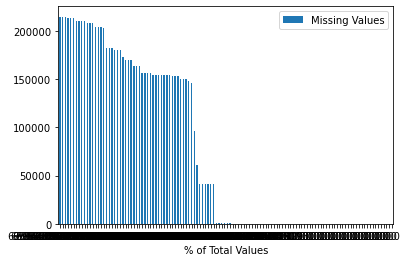

In [19]:
ax = missing_application_train_data.plot.bar(x='% of Total Values',  rot=0)

plt.show()
# 50% of columns have missing or null values

## Explore dataframe : application_train

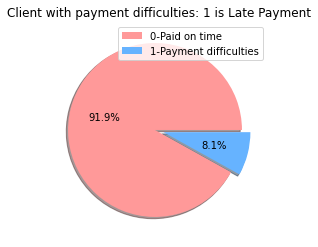

In [125]:
# Column Name: TARGET 
# definition: 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
data = application_train['TARGET'].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='Client with payment difficulties: 1 is Late Payment', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.legend(('0-Paid on time', '1-Payment difficulties'))
plt.show()

Observations :

    - 91% of previous client paid loans on time. 8% had late payements.
    - This column is the target output variable that the model will have to give as an answer.

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE'>

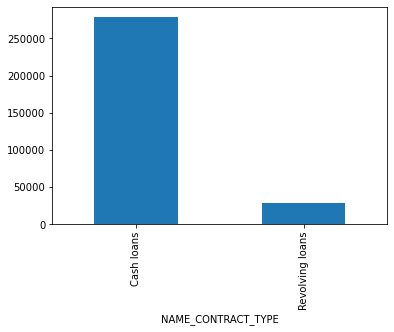

In [167]:
# Column Name: 'NAME_CONTRACT_TYPE'

application_train.value_counts('NAME_CONTRACT_TYPE').plot(kind='bar',)

Observations :
    -Most clients took cash loans

In [42]:
# Funtion Declaration
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html

def stack_plot(data, xtick, col2='TARGET', col3='total'):
    ind = np.arange(data.shape[0])
    
    if len(data[xtick].unique())<5:
        plt.figure(figsize=(5,5))
    elif len(data[xtick].unique())>5 & len(data[xtick].unique())<10:
        plt.figure(figsize=(7,7))
    else:
        plt.figure(figsize=(15,15))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Number of Individual Borrowers')
    plt.xlabel(xtick)
    plt.title('Historic Payment Breakdown')
    plt.xticks(ticks=ind,rotation=90,labels= data[xtick].values)
    plt.legend((p1[0], p2[0]), ('0-Paid on time', '1-Payment difficulties'))
    plt.show()
    
def grouped_barplot(data, col1, col2='TARGET', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(application_train.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(application_train.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Difficulties as % of Bucket Total (%)'] = pd.DataFrame(application_train.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp)
    

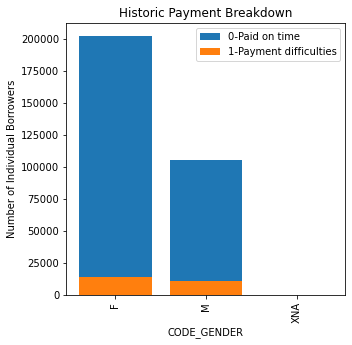

  CODE_GENDER  TARGET   total  Difficulties as % of Bucket Total (%)
0           F   14170  202448                               0.069993
1           M   10655  105059                               0.101419
2         XNA       0       4                               0.000000


In [43]:
grouped_barplot(application_train, 'CODE_GENDER', 'TARGET', False)

Observation:

    - Women took much more number of loans as compared to Men 

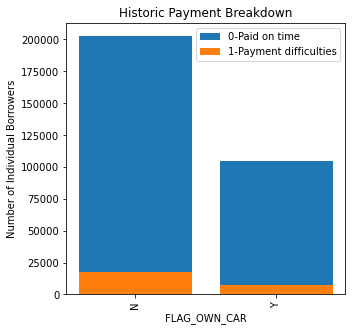

  FLAG_OWN_CAR  TARGET   total  Difficulties as % of Bucket Total (%)
0            N   17249  202924                               0.085002
1            Y    7576  104587                               0.072437


In [44]:
grouped_barplot(application_train, 'FLAG_OWN_CAR', 'TARGET', False)

Most of the applicants for loans do not own a car. 

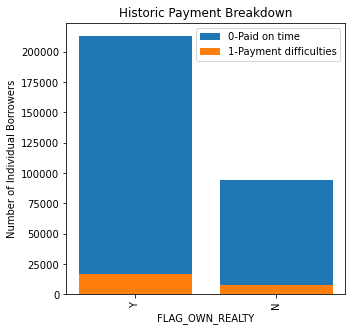

  FLAG_OWN_REALTY  TARGET   total  Difficulties as % of Bucket Total (%)
1               Y   16983  213312                               0.079616
0               N    7842   94199                               0.083249


In [45]:
grouped_barplot(application_train, 'FLAG_OWN_REALTY', 'TARGET', False)

Observation:

    - Most of the applicants for loans own a flat/house.

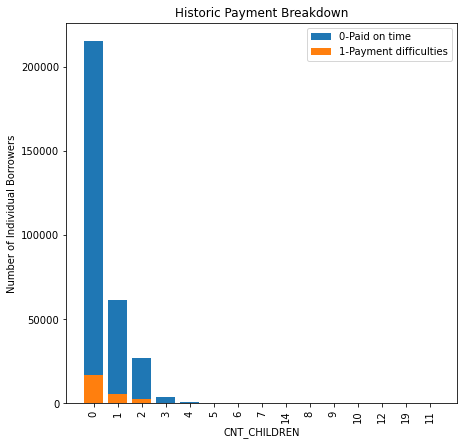

    CNT_CHILDREN  TARGET   total  Difficulties as % of Bucket Total (%)
0              0   16609  215371                               0.077118
1              1    5454   61119                               0.089236
2              2    2333   26749                               0.087218
3              3     358    3717                               0.096314
4              4      55     429                               0.128205
5              5       7      84                               0.083333
6              6       6      21                               0.285714
7              7       0       7                               0.000000
13            14       0       3                               0.000000
8              8       0       2                               0.000000
9              9       2       2                               1.000000
10            10       0       2                               0.000000
12            12       0       2                               0

In [46]:
grouped_barplot(application_train, 'CNT_CHILDREN', 'TARGET', False)

# Observation:

    - Most of the applicants for loans have zero or one chid.

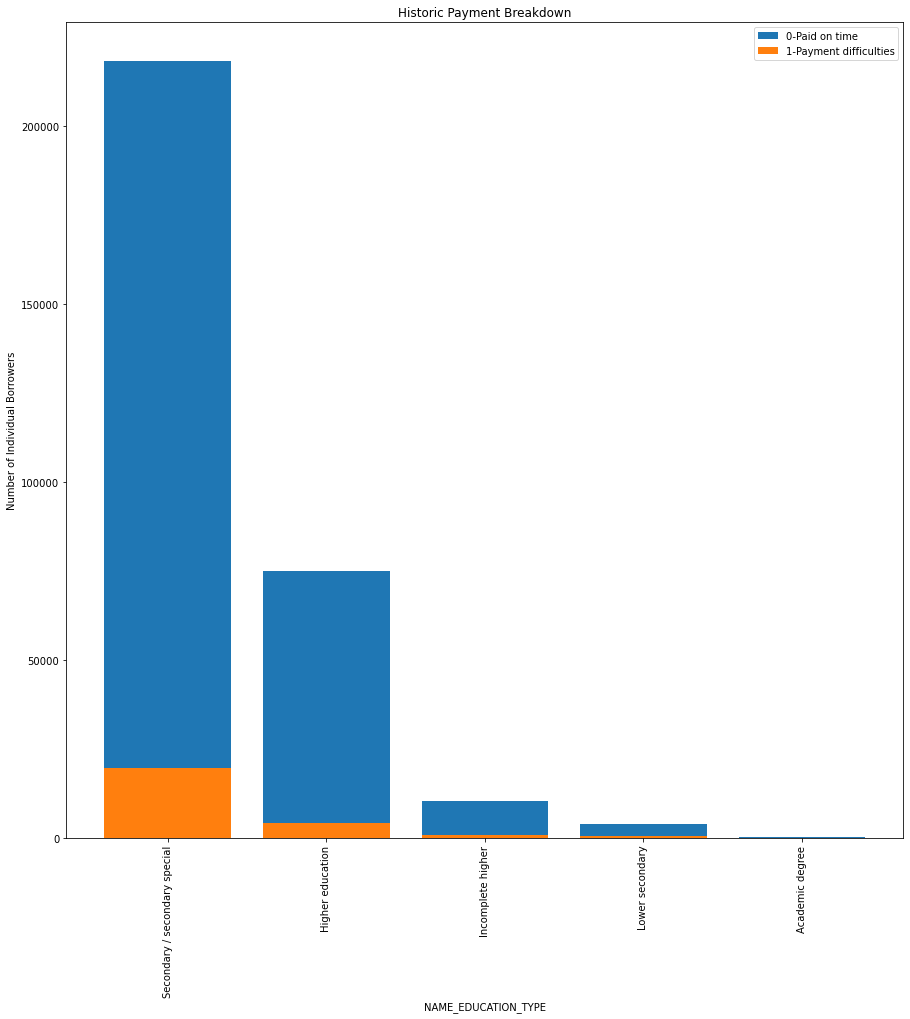

             NAME_EDUCATION_TYPE  TARGET   total  \
4  Secondary / secondary special   19524  218391   
1               Higher education    4009   74863   
2              Incomplete higher     872   10277   
3                Lower secondary     417    3816   
0                Academic degree       3     164   

   Difficulties as % of Bucket Total (%)  
4                               0.089399  
1                               0.053551  
2                               0.084850  
3                               0.109277  
0                               0.018293  


In [70]:
grouped_barplot(application_train, 'NAME_EDUCATION_TYPE', 'TARGET', False)

# Observation:

    - Most of the applicants only have a secondary education.

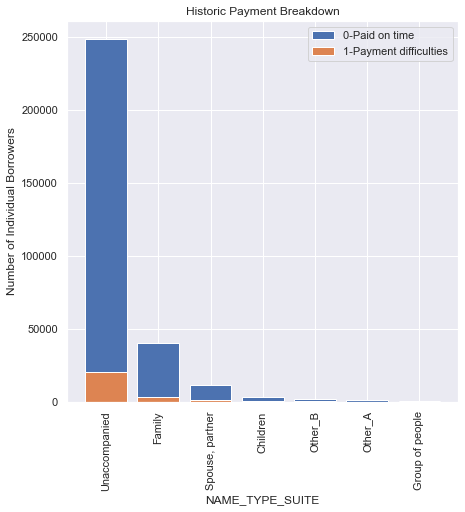

   NAME_TYPE_SUITE  TARGET   total  Difficulties as % of Bucket Total (%)
6    Unaccompanied   20337  248526                               0.081830
1           Family    3009   40149                               0.074946
5  Spouse, partner     895   11370                               0.078716
0         Children     241    3267                               0.073768
4          Other_B     174    1770                               0.098305
3          Other_A      76     866                               0.087760
2  Group of people      23     271                               0.084871


In [131]:
grouped_barplot(application_train, 'NAME_TYPE_SUITE', 'TARGET', False)

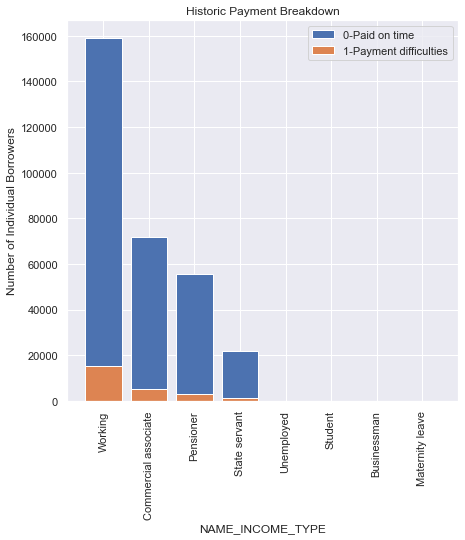

       NAME_INCOME_TYPE  TARGET   total  Difficulties as % of Bucket Total (%)
7               Working   15224  158774                               0.095885
1  Commercial associate    5360   71617                               0.074843
3             Pensioner    2982   55362                               0.053864
4         State servant    1249   21703                               0.057550
6            Unemployed       8      22                               0.363636
5               Student       0      18                               0.000000
0           Businessman       0      10                               0.000000
2       Maternity leave       2       5                               0.400000


In [132]:
grouped_barplot(application_train, 'NAME_INCOME_TYPE', 'TARGET', False)

In [64]:
x= application_train.AMT_INCOME_TOTAL
x.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

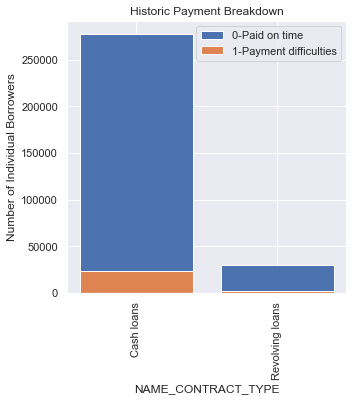

  NAME_CONTRACT_TYPE  TARGET   total  Difficulties as % of Bucket Total (%)
0         Cash loans   23221  278232                               0.083459
1    Revolving loans    1604   29279                               0.054783


In [133]:
grouped_barplot(application_train, 'NAME_CONTRACT_TYPE', 'TARGET', False)

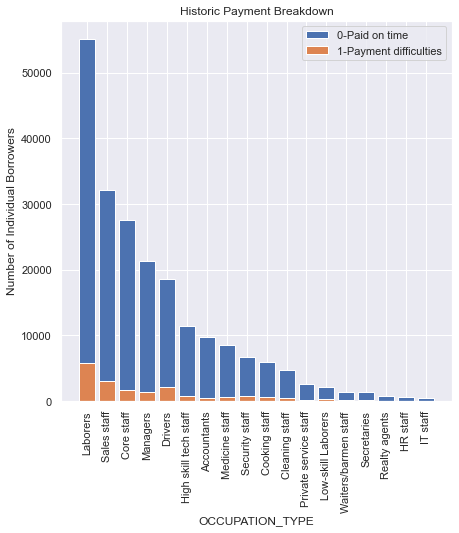

          OCCUPATION_TYPE  TARGET  total  \
8                Laborers    5838  55186   
14            Sales staff    3092  32102   
3              Core staff    1738  27570   
10               Managers    1328  21371   
4                 Drivers    2107  18603   
6   High skill tech staff     701  11380   
0             Accountants     474   9813   
11         Medicine staff     572   8537   
16         Security staff     722   6721   
2           Cooking staff     621   5946   
1          Cleaning staff     447   4653   
12  Private service staff     175   2652   
9      Low-skill Laborers     359   2093   
17   Waiters/barmen staff     152   1348   
15            Secretaries      92   1305   
13          Realty agents      59    751   
5                HR staff      36    563   
7                IT staff      34    526   

    Difficulties as % of Bucket Total (%)  
8                                0.105788  
14                               0.096318  
3                              

In [134]:
grouped_barplot(application_train, 'OCCUPATION_TYPE', 'TARGET', False)

# Observation:
    - High non-repayment rate is observed in Laborers. Espacilly low-skill Laborers with highest target rate of 17.15%
    - We see siginificant non-repayment rate difference among occupation type so I conclude that ”OCCUPATION_TYPE” could be a important feature

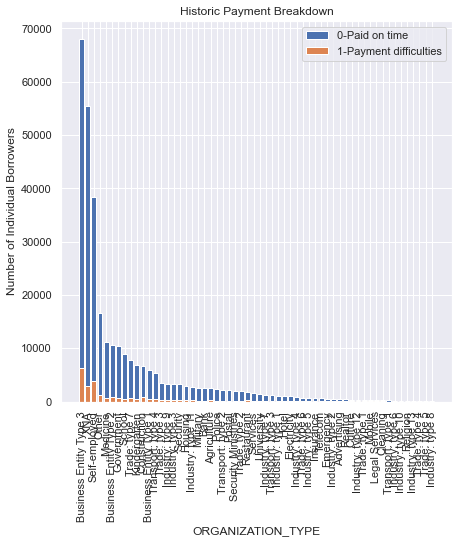

         ORGANIZATION_TYPE  TARGET  total  \
5   Business Entity Type 3    6323  67992   
57                     XNA    2990  55374   
42           Self-employed    3908  38412   
33                   Other    1275  16683   
30                Medicine     737  11193   
4   Business Entity Type 2     900  10553   
11              Government     726  10404   
39                  School     526   8893   
51           Trade: type 7     740   7831   
28            Kindergarten     484   6880   
7             Construction     785   6721   
3   Business Entity Type 1     487   5984   
55       Transport: type 4     501   5398   
47           Trade: type 3     361   3492   
26        Industry: type 9     225   3368   
20        Industry: type 3     348   3278   
40                Security     324   3247   
13                 Housing     235   2958   
16       Industry: type 11     234   2704   
31                Military     135   2634   
2                     Bank     130   2507   
1         

In [135]:
grouped_barplot(application_train, 'ORGANIZATION_TYPE', 'TARGET', False)

<AxesSubplot:>

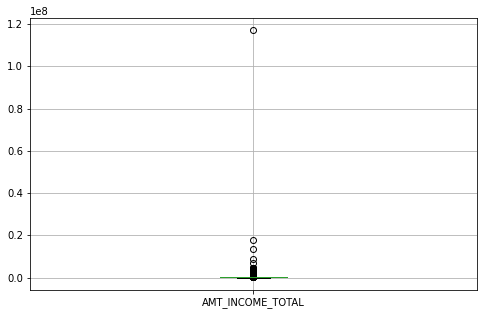

In [14]:
# AMT_INCOME_TOTAL Boxplot
application_train.boxplot(column="AMT_INCOME_TOTAL",return_type='axes',figsize=(8,5))

# Observation:
    -Outlier in income data is distorting data

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

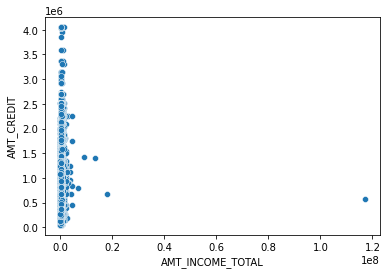

In [74]:
#plot the scatter plot of Total Income-AMT_INCOME_TOTAL and AMT_CREDIT  variable
sns.scatterplot(x=application_train.AMT_INCOME_TOTAL,y=application_train.AMT_CREDIT)

 #  Outlier is distorting data in column AMT_INCOME_TOTAL
     -5% to 95% series interval adjsutment

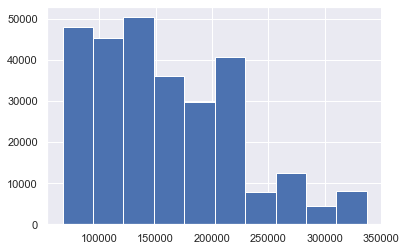

count    283357.000000
mean     157949.455374
std       62029.483190
min       67500.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

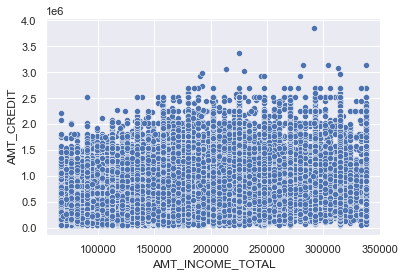

In [122]:
pd_series = application_train.AMT_INCOME_TOTAL
pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))] 

#Plot Adjusted Histogram- Matplotlib
sns.set(style="darkgrid")
plt.hist(pd_series_adjusted, bins=10, density=False)
plt.show()

print(pd_series_adjusted.describe())


#plot the scatter plot of Total Income-AMT_INCOME_TOTAL and AMT_CREDIT approved and borrowed
sns.scatterplot(x=pd_series_adjusted,y=application_train.AMT_CREDIT)

# Observation:

    - after correcting for outliers 75% of loans are to clients earning less then 250 000.
    - Loans get larger as the clients income increases.
    - Average income of client is 157 000. 
    - Distribution skewed to right


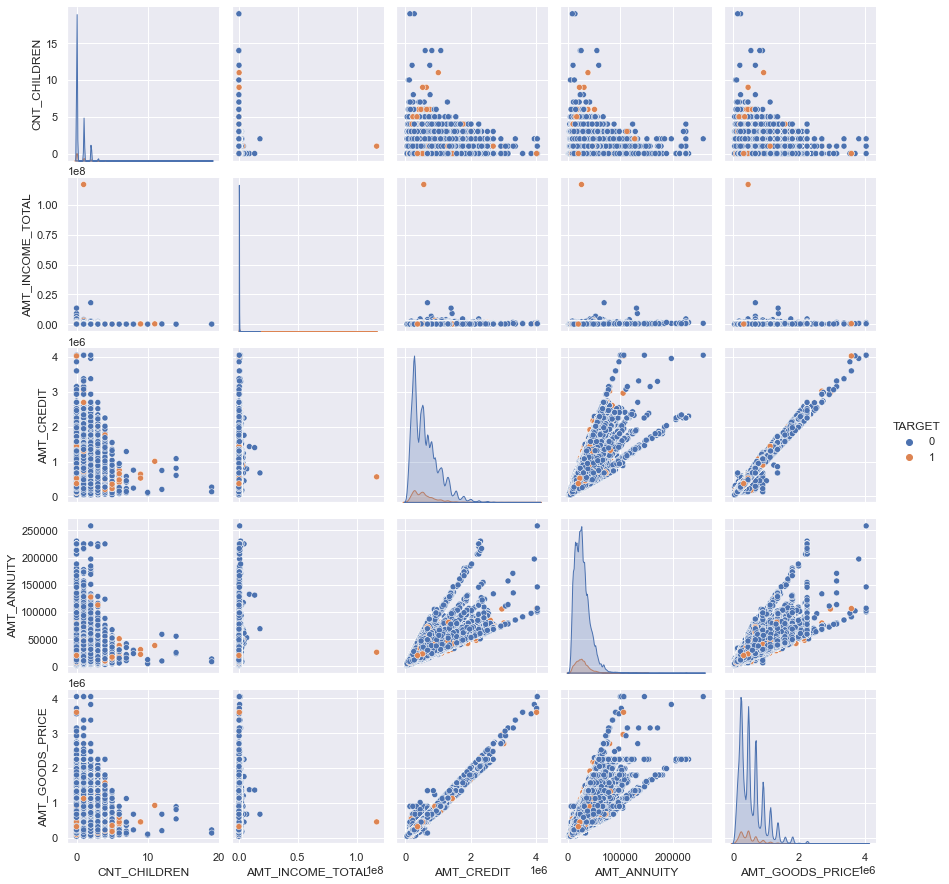

In [109]:

#plot the pair plot of 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE' in  dataframe.
sns.pairplot(data = application_train,hue='TARGET',diag_kind = 'kde', vars=['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'])
plt.show()

# Observation:
    -With increase in amount credit ,amount of goods price increases 
    -With increase in Ammount annuity the amount of goods price increases

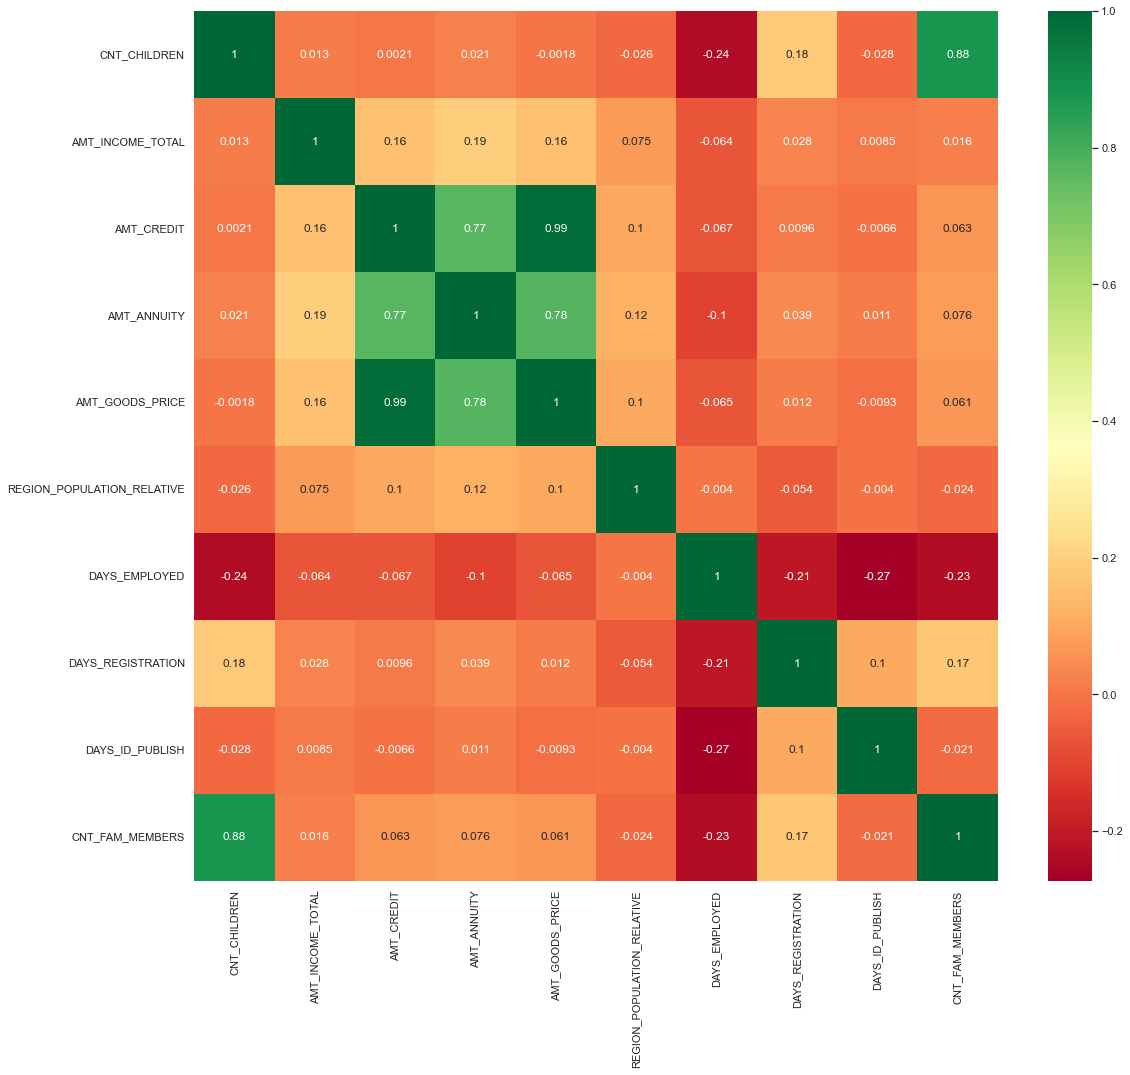

In [113]:
My_Columns =['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS']
plt.figure(figsize=(18,16))
#plot the correlation matrix for My selected Columns
sns.heatmap(application_train[My_Columns].corr(), annot=True, cmap = 'RdYlGn')
plt.show()

In [22]:

# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64


# Observation:
    - significant correlations:
      DAYS_BIRTH is the most positive correlation. 
      EXT_SOURCE_3 is the most negative correlation. This an external credit score value.

# Effect of Age on Repayment 
    -DAYS_BIRTH:   units are in days not years.
    -The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan                application. To see these stats in years, we can multiply by -1 and divide by the number of days in a year:

In [118]:
application_train.DAYS_BIRTH.describe()
# Negative days = DOB - LoanDate

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

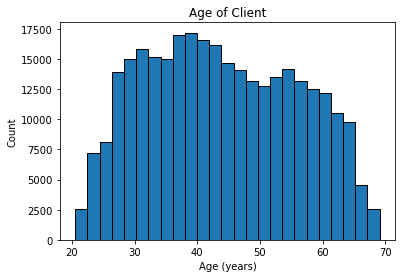

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE_YEARS, dtype: float64


In [33]:
#Convert all negative days to positive
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['AGE_YEARS'] = (application_train['DAYS_BIRTH'] / 365) #Create new column


# Plot the distribution of ages in years
plt.hist(application_train['AGE_YEARS'], edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()
print(application_train.AGE_YEARS.describe())

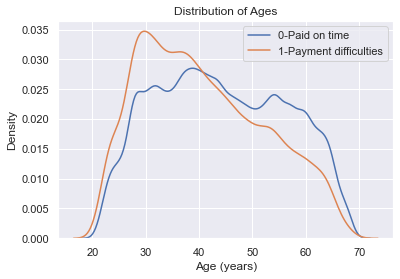

In [130]:

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'AGE_YEARS'] , label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'AGE_YEARS'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

plt.legend(('0-Paid on time', '1-Payment difficulties'))

# Observation
    - Younger people around 30 years old have more difficulty paying loans back
    - Mean age of borrowers are 43.9 years old with standard deviation of 11.9 years.

# Effect of EXTERNAL_SOURCE_3  on Repayment

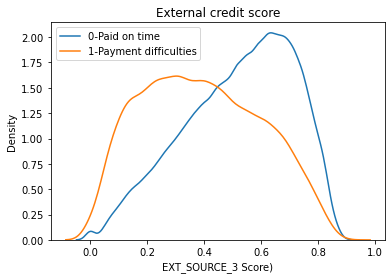

In [35]:
ext_source= application_train['EXT_SOURCE_3']
 
    # KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'EXT_SOURCE_3'] , label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'EXT_SOURCE_3'] , label = 'target == 1')

# Labeling of plot
plt.xlabel('EXT_SOURCE_3 Score)'); plt.ylabel('Density'); plt.title('External credit score');

plt.legend(('0-Paid on time', '1-Payment difficulties'))




# Observation
    - EXT_SOURCE_3 had previously shown significant negative correlation with TARGET
    - EXT_SOURCE_3 is an external Credit Score between 0.0 and 1.0
    - Lower score means more likely to have payment difficulties.

In [24]:
from pandas_profiling import ProfileReport

prof = ProfileReport(application_train)
prof.to_file(output_file='wpg_inspect_pandas_prof.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\HQ\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\HQ\anaconda3\lib\site-packages\scipy\stats\stats.py:4814: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))
C:\Users\HQ\anaconda3\lib\site-packages\missingno\missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
C:\Users\HQ\anaconda3\lib\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a c

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning Begins Here 
## cleaned data begins df_

In [16]:
# keep original tables 
df_application_train = application_train
df_previous_application = previous_application
df_installments_payments = installments_payments
df_bureau = bureau
df_POS_CASH_balance = POS_CASH_balance
df_bureau_balance = bureau_balance
df_credit_card_balance = credit_card_balance


In [77]:
# Create list of all clean dataframes 
df_All= [df_application_train,
        df_previous_application,
        df_installments_payments,
        df_bureau,
        df_POS_CASH_balance,
        df_bureau_balance,
        df_credit_card_balance]

In [78]:
df_application_train.index.name = "df_application_train"
df_previous_application.index.name = "df_previous_application"
df_installments_payments.index.name = "df_installments_payments"
df_bureau.index.name = "df_bureau"
df_POS_CASH_balance.index.name = "df_POS_CASH_balance"
df_bureau_balance.index.name = "df_bureau_balance"
df_credit_card_balance.index.name = "df_credit_card_balance"

In [22]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [23]:
def missing_data_column_names(df): # Return column names with missig data 
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
    delete_columns =  mis_val_table_ren_columns[mis_val_table_ren_columns['% of Total Values'].values > 60]
    col_names = delete_columns.index
    return col_names

In [9]:
# Delete columns with missing values as greater than 60% missing  
missing_columns=missing_data_column_names(df_application_train)
missing_columns

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [20]:
print("Number of Columns with Null Values:")
for i in df_All:
    print((i.index.name),i.isnull().any().sum())

Number of Columns with Null:
df_application_train 67
df_previous_application 16
df_installments_payments 2
df_bureau 7
df_POS_CASH_balance 2
df_bureau_balance 0
df_credit_card_balance 9


In [24]:
# Apply column cleaning with missing data
for i in df_All:
    missing_columns=missing_data_column_names(i)
    i.drop(missing_columns, axis = 1, inplace = True)
print("Done")

Done


In [25]:
print("Number of Columns with Null:")
for i in df_All:
    print((i.index.name),i.isnull().any().sum())

Number of Columns with Null:
df_application_train 50
df_previous_application 14
df_installments_payments 2
df_bureau 5
df_POS_CASH_balance 2
df_bureau_balance 0
df_credit_card_balance 9


In [27]:
# delete all rows that have nulls
for i in df_All:
    #i = i[~i.isnull()]
    i.dropna(inplace = True)
    #print((i.index.name))
print("Done")

df_application_train
df_previous_application
df_installments_payments
df_bureau
df_POS_CASH_balance
df_bureau_balance
df_credit_card_balance
Done


In [32]:
print("Number of Columns with Null:")
for i in df_All:
    print((i.index.name),i.isnull().any().sum())

Number of Columns with Null:
df_application_train 0
df_previous_application 0
df_installments_payments 0
df_bureau 0
df_POS_CASH_balance 0
df_bureau_balance 0
df_credit_card_balance 0


In [40]:
print("Shape per data frame:")
for i in df_All:
    print((i.index.name),i.shape)

Shape per data frame:
df_application_train (31365, 105)
df_previous_application (430536, 35)
df_installments_payments (13602496, 8)
df_bureau (652544, 15)
df_POS_CASH_balance (9975174, 8)
df_bureau_balance (27299925, 3)
df_credit_card_balance (3014276, 23)


In [33]:
# List Numerical and catergorical columns:
for i in df_All:
    numeric_cols = i.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = i.select_dtypes('object').columns.tolist()
    # List catergorical columns in dataset
    # print(i.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
    print(numeric_cols)
    print(categorical_cols)
    print(" ")
print("Done")

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_M

In [126]:
df_Merged = df_application_train
df_Merged = df_Merged.join(df_POS_CASH_balance, how='left', lsuffix='_caller', on='SK_ID_CURR')

### save as .csv file
df_Merged.to_csv('home_features.csv')

In [36]:
print("Number of Columns with Null:")
for i in df_All:
    print((i.index.name),i.isnull().any().sum())

Number of Columns with Null:
df_application_train 0
df_previous_application 0
df_installments_payments 0
df_bureau 0
df_POS_CASH_balance 0
df_bureau_balance 0
df_credit_card_balance 0


In [94]:
for i in df_All:
    # Find correlations with the target and sort
    
    print((i.index.name))
    i['tgt']= df_application_train['TARGET']
    cr_table = cr_table.append(i.corr().tgt.sort_values())
    i.drop('tgt', axis=1, inplace=True)
    # Find correlations with the target and sort
    #correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
cr_table.sort_values()
print('\nMost Positive Correlations:\n', cr_table.tail(5))
print('\nMost Negative Correlations:\n', cr_table.head(5))    

df_application_train
df_previous_application
df_installments_payments
df_bureau
df_POS_CASH_balance
df_bureau_balance
df_credit_card_balance

Most Positive Correlations:
 AMT_CREDIT_LIMIT_ACTUAL      0.002730
SK_ID_PREV                   0.003470
CNT_INSTALMENT_MATURE_CUM    0.006487
SK_DPD                       0.008179
tgt                          1.000000
Name: tgt, dtype: float64

Most Negative Correlations:
 CNT_DRAWINGS_OTHER_CURRENT   -0.011267
AMT_DRAWINGS_OTHER_CURRENT   -0.009574
CNT_DRAWINGS_POS_CURRENT     -0.006418
CNT_DRAWINGS_CURRENT         -0.005681
SK_DPD_DEF                   -0.002813
Name: tgt, dtype: float64


In [97]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
df_bureau,,,,,,,,,,,,,,,
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,0,76878.45,0.0,0.0,0.0,Consumer credit,-1710
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0,103007.70,0.0,0.0,0.0,Consumer credit,-840
11,162297,5714473,Closed,currency 1,-2456,0,-629.0,-825.0,0,675000.00,0.0,0.0,0.0,Consumer credit,-706
14,238881,5714482,Closed,currency 1,-318,0,-187.0,-187.0,0,0.00,0.0,0.0,0.0,Credit card,-185
19,238881,5714488,Closed,currency 1,-444,0,-77.0,-77.0,0,107184.06,0.0,0.0,0.0,Consumer credit,-71


# Select Important Features Starts Here

In [123]:
df_SK_ID_CURR = df_application_train.SK_ID_CURR

In [125]:
df_SK_ID_CURR.reset_index(drop=True, inplace=True)

In [126]:
df_SK_ID_CURR

0        100002
1        100030
2        100058
3        100059
4        100063
          ...  
31360    456193
31361    456195
31362    456215
31363    456218
31364    456226
Name: SK_ID_CURR, Length: 31365, dtype: int64

In [131]:
df_SK_ID_CURR.index.name= 'df_SK_ID_CURR'

In [137]:
df_SK_ID_CURR.iloc[0:0]

Series([], Name: SK_ID_CURR, dtype: int64)

In [130]:
df_clean_data = pd.merge(df_SK_ID_CURR, df_application_data, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR' )

TypeError: merge() missing 2 required positional arguments: 'left' and 'right'

In [ ]:
df_clean_data = pd.join(df_SK_ID_CURR, df_application_data, )

df = pd.merge(df_SK_ID_CURR,df_application_data[['SK_ID_CURR','Target_Column']],on='SK_ID_CURR'', how='left')